**Importing required modules**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf

from matplotlib import pyplot as plt
# from sklearn.feature_selection import *
import pandas as pd
import numpy as np

**Load dataset**



**Email.csv Description**:



Content:- The dataset contains email received. The dataset contains two columns Text and Spam.

Text :- Text / Email received.

Spam:- Whether the email received is spam or not

Class 0: NOT SPAM

Class 1: SPAM




In [ ]:
dataset_1_path = '/content/drive/MyDrive/Email_spam_classifier_datasets/emails.csv'
dataset_2_path = '/content/drive/MyDrive/Email_spam_classifier_datasets/spam.csv'
dataset_1 =  pd.read_csv(dataset_1_path,index_col=None)
dataset_2 =  pd.read_csv(dataset_2_path,index_col=None)
email_csv_df = dataset_1.copy()
spam_csv_df = dataset_2.copy()

## EDA (Exploratory Data Analysis)

#### Email.csv

In [ ]:
email_csv_df

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


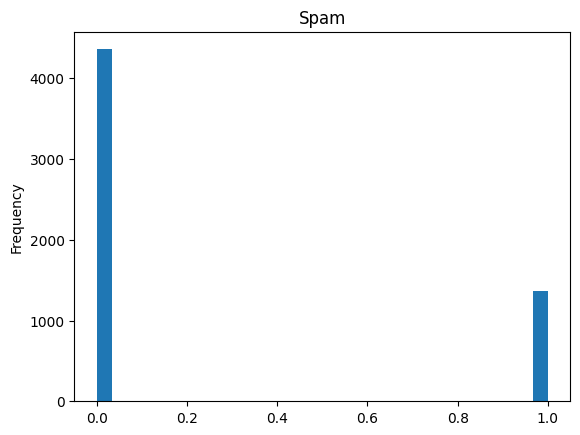

In [ ]:

email_csv_df['Spam'].plot(kind='hist',bins= 30, title='Spam')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
(email_csv_df[email_csv_df['Spam']==1].shape[0]/ email_csv_df.shape[0])*100

23.88268156424581

##### Spam.csv

In [ ]:
spam_csv_df.rename(columns=dict(zip([ 'Message','Category'],['Text', 'Spam'],)),inplace=True)
spam_csv_df.Spam.unique()

array(['ham', 'spam'], dtype=object)

In [ ]:
spam_csv_df['Spam'] = spam_csv_df['Spam'].apply(lambda x: 0 if str(x).lower()== 'ham' else 1)

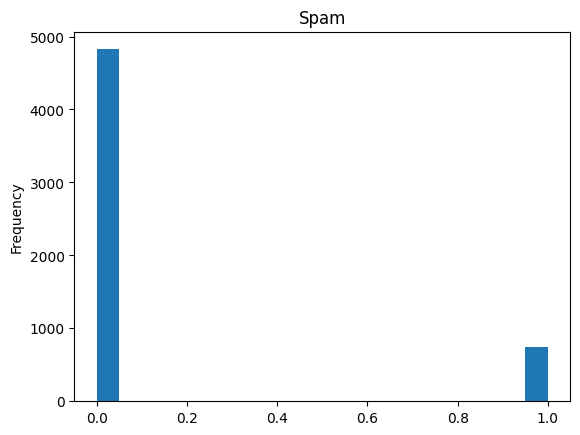

In [ ]:
spam_csv_df['Spam'].plot(kind='hist',bins= 20, title='Spam')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
(spam_csv_df[spam_csv_df['Spam']==1].shape[0]/ spam_csv_df.shape[0])*100

13.406317300789663

In [ ]:
spam_csv_df.columns
spam_csv_df.Spam.unique()

array([0, 1])

In [ ]:
spam_csv_df = spam_csv_df[['Text', 'Spam']]
only_spam_csv_df=spam_csv_df[spam_csv_df['Spam']==1]

Oversampled Data by concating 2 csv files since there is class imbalancemnt

In [ ]:
email_spam_df = pd.concat([email_csv_df,only_spam_csv_df],ignore_index = True)

In [ ]:
print(email_spam_df.shape)
print(email_spam_df.Spam.unique())

(6475, 2)
[1 0]


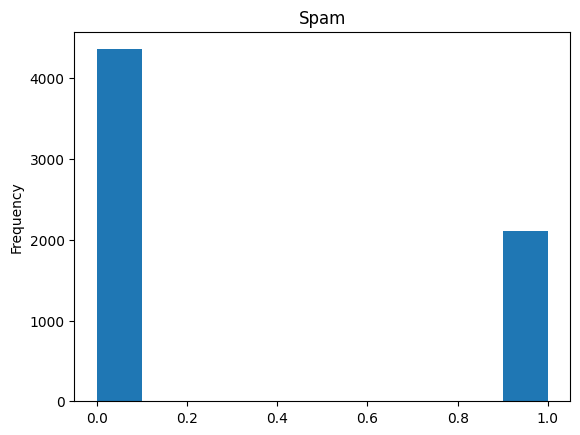

In [ ]:
from matplotlib import pyplot as plt
email_spam_df['Spam'].plot(kind='hist', title='Spam')
plt.gca().spines[['top', 'right',]].set_visible(True)

In [ ]:
(email_spam_df[email_spam_df['Spam']==1].shape[0]/ email_spam_df.shape[0])*100

32.664092664092664

In [ ]:
email_spam_df

,Text,Spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
6470,Want explicit SEX in 30 secs? Ring 02073162414...,1
6471,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,1
6472,Had your contract mobile 11 Mnths? Latest Moto...,1
6473,REMINDER FROM O2: To get 2.50 pounds free call...,1


## **Count Vectorizer**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import pandas as pd

# load data
spam_data = email_spam_df#pd.read_csv('spam.csv')

# create X and y
X = spam_data['Text']
y = spam_data['Spam']

# initialize count vectorizer
count_vectorizer = CountVectorizer()

# fit transform the emails
X_counts = count_vectorizer.fit_transform(X)
X_counts

<6475x38661 sparse matrix of type '<class 'numpy.int64'>'
	with 724642 stored elements in Compressed Sparse Row format>

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=101)
y_test.value_counts()

0    888
1    407
Name: Spam, dtype: int64

In [ ]:
print('WITH SPAM COUNT: ',y_test[y_test==1].shape)
print('WITHOUT SPAM COUNT: ',y_test[y_test==0].shape)
print(f'WITH SPAM %: {(y_test[y_test==1].shape[0]/y_test.shape[0])*100} ')

WITH SPAM COUNT:  (407,)
WITHOUT SPAM COUNT:  (888,)
WITH SPAM %: 31.428571428571427 


In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2, random_state=101,stratify=y)
y_test.value_counts()

0    872
1    423
Name: Spam, dtype: int64

In [ ]:
print('STRATIFIED SPAM COUNT: ',y_test[y_test==1].shape)
print('STRATIFIED NON-SPAM COUNT: ',y_test[y_test==0].shape)
print(f'STRATIFIED SPAM %: {(y_test[y_test==1].shape[0]/y_test.shape[0])*100} ')

STRATIFIED SPAM COUNT:  (423,)
STRATIFIED NON-SPAM COUNT:  (872,)
STRATIFIED SPAM %: 32.664092664092664 


In [ ]:

mnb = MultinomialNB()


mnb.fit(X_train, y_train)


pred = mnb.predict(X_test)

# calculate the accuracy
accuracy = (pred == y_test).mean()
print('Accuracy:', accuracy)
print('MNb prediction',pred)

Accuracy: 0.9907335907335907
MNb prediction [0 0 0 ... 0 1 0]


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

<Axes: >

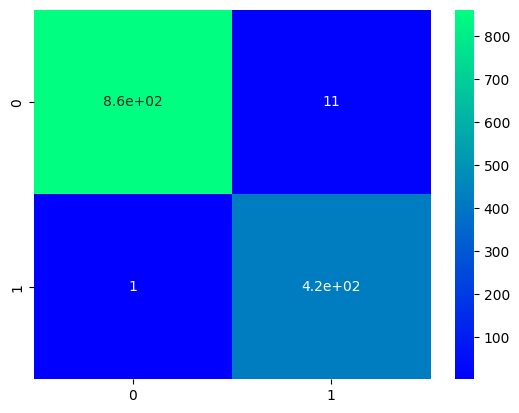

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred),cmap='winter',annot=True)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      1.00      0.99       423

    accuracy                           0.99      1295
   macro avg       0.99      0.99      0.99      1295
weighted avg       0.99      0.99      0.99      1295



***Live spam test***

### TF-IDF

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')


X_vec = vectorizer.fit_transform(X)

# convert vector to numpy array
X_vec = X_vec.toarray()

In [ ]:
X_vec

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=101,stratify=y)
y_test.value_counts()

0    872
1    423
Name: Spam, dtype: int64

In [ ]:

mnb2 = MultinomialNB()

mnb2.fit(X_train, y_train)

pred2 = mnb2.predict(X_test)

# calculate the accuracy
accuracy = (pred2 == y_test).mean()
print('Accuracy:', accuracy)
print('pred2',pred2)

Accuracy: 0.9822393822393822
pred2 [0 0 0 ... 0 1 0]


<Axes: >

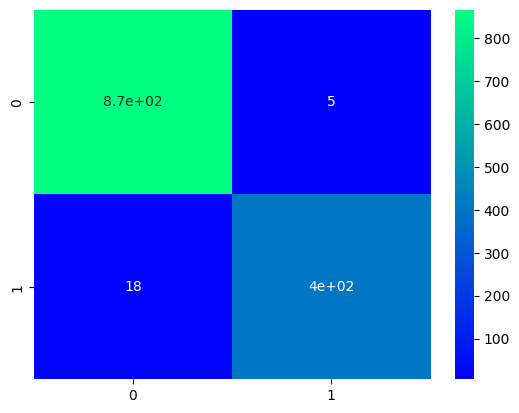

In [ ]:
sns.heatmap(confusion_matrix(y_test,pred2),cmap='winter',annot=True)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       872
           1       0.97      1.00      0.99       423

    accuracy                           0.99      1295
   macro avg       0.99      0.99      0.99      1295
weighted avg       0.99      0.99      0.99      1295



***Testing on live spam data ***

### Tensorflow

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.metrics import AUC
import pandas as pd
import numpy as np

# load data
spam_data = email_spam_df

# create X and y
X = spam_data['Text']
y = spam_data['Spam']



tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X)


X_tokens = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_tokens, maxlen=100, padding='post')

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.35, random_state=42,stratify=y)

# define model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=100),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',AUC()])

# train model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[callback])




Epoch 1/50
132/132 [==============================] - 28s 151ms/step - loss: 0.4918 - accuracy: 0.8085 - auc: 0.8512 - val_loss: 0.3052 - val_accuracy: 0.8712 - val_auc: 0.9560
Epoch 2/50
132/132 [==============================] - 10s 76ms/step - loss: 0.1875 - accuracy: 0.9394 - auc: 0.9869 - val_loss: 0.1302 - val_accuracy: 0.9625 - val_auc: 0.9929
Epoch 3/50
132/132 [==============================] - 7s 57ms/step - loss: 0.0843 - accuracy: 0.9774 - auc: 0.9980 - val_loss: 0.0813 - val_accuracy: 0.9727 - val_auc: 0.9970
Epoch 4/50
132/132 [==============================] - 5s 39ms/step - loss: 0.0468 - accuracy: 0.9910 - auc: 0.9995 - val_loss: 0.0582 - val_accuracy: 0.9846 - val_auc: 0.9980
Epoch 5/50
132/132 [==============================] - 4s 27ms/step - loss: 0.0289 - accuracy: 0.9948 - auc: 0.9999 - val_loss: 0.0480 - val_accuracy: 0.9885 - val_auc: 0.9983
Epoch 6/50
132/132 [==============================] - 3s 20ms/step - loss: 0.0196 - accuracy: 0.9962 - auc: 1.0000 - val_l

In [ ]:
# evaluate model
test_output = model.evaluate(X_test, y_test)
print('Test Accuracy:', test_output)

71/71 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9890 - auc: 0.9972
Test Accuracy: [0.0371781587600708, 0.9889721870422363, 0.9971760511398315]


In [ ]:
Ypred=model.predict(X_test)

71/71 [==============================] - 0s 2ms/step


Plot for Loss and validation loss VS accuracy and validtion accuracy

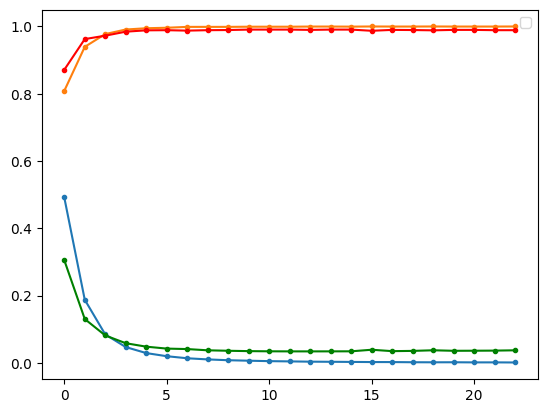

In [ ]:
plt.plot(history.history['loss'],marker='.')
plt.plot(history.history['val_loss'],color = 'green',marker='.')

plt.plot(history.history['accuracy'],marker='.')
plt.plot(history.history['val_accuracy'],color = 'red',marker='.')
plt.legend()

Plot between AUC and Validation AUC

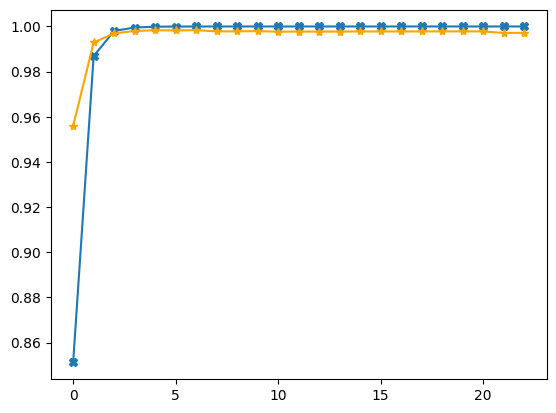

In [ ]:
plt.plot(history.history['auc'],marker='X')
plt.plot(history.history['val_auc'],color = 'orange',marker = '*')



In [ ]:
print(classification_report(y_test,Ypred.round()))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1527
           1       0.98      0.99      0.98       740

    accuracy                           0.99      2267
   macro avg       0.99      0.99      0.99      2267
weighted avg       0.99      0.99      0.99      2267



[[1510   17]
 [   8  732]]


<Axes: >

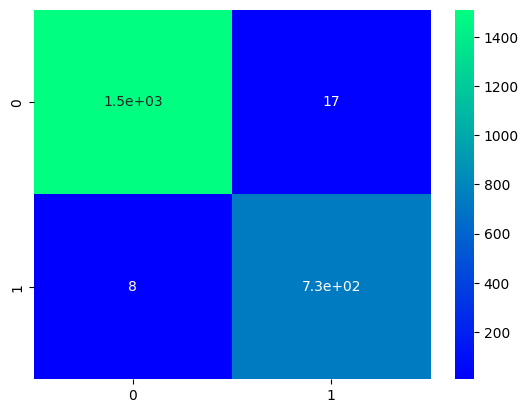

In [ ]:
print(confusion_matrix(y_test,Ypred.round()))
sns.heatmap(confusion_matrix(y_test,Ypred.round()),cmap = 'winter',annot = True)

***Live spam test***

In [ ]:
spam_text = ["""Urgent Hiring for Gen Ai- Developer at Infosys Limited,
Recruiter from Infosys Limited is actively hiring for Gen Ai- Developer and your profile seems to be a good match.
Role: Gen Ai- Developer
Experience required: 1-2yrs
Annual CTC: 2-7LPA
Kindly share the below details and resume on the subsequent page to apply for this role."""]

In [ ]:

tokenizer.fit_on_texts(spam_text)


spam_tokens = tokenizer.texts_to_sequences(spam_text)
spam_pad = pad_sequences(spam_tokens, maxlen=100, padding='post')
deep_pred = model.predict(spam_pad)

1/1 [==============================] - 0s 18ms/step


In [ ]:
deep_pred.round()

array([[1.]], dtype=float32)